In [29]:
import cpi 

import pandas as pd
from datetime import date 


import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

In [3]:
cpi.update()

In [96]:
l = [0] * (years_elapsed//5)
l[0] = 250
for x in range(1,len(l)): 
    l[x] = l[x-1] * 1.2445

missing_years = [
    {'year' : 1960, 'price' : l[1]},
    {'year' : 1965, 'price' : l[2]},
    {'year' : 1970, 'price' : l[3]}, 
    {'year' : 1975, 'price' : l[4]}, 
    {'year' : 1980, 'price' : l[5]}, 
    {'year' : 1985, 'price' : l[6]}, 
]

medium_classic_flap = [
    {'year' : 1955, 'price' : 250}, 
    {'year' : 1990, 'price' : 1150},
    {'year' : 2009, 'price' : 2695}, 
    {'year' : 2010, 'price' : 2850}, 
    {'year' : 2011, 'price' : 3900}, 
    {'year' : 2013, 'price' : 4400}, 
    {'year' : 2014, 'price' : 4900}, 
    {'year' : 2016, 'price' : 5500}, 
    {'year' : 2017, 'price' : 5900}, 
    {'year' : 2020, 'price' : 6500}, 
    {'year' : 2021, 'price' : 8800}
]
multiple_increases = [
    {"2021-01" : 6850}, 
    {"2021-05" : 7800}, 
    {"2021-11" : 8800}
]

In [97]:
med_classic = pd.DataFrame(medium_classic_flap)
med_classic['value_today'] = round(med_classic.apply(lambda x: cpi.inflate(x['price'],x['year']),axis=1),2)
med_classic['change_today'] = (med_classic['value_today'] - med_classic['value_today'].shift(1)) / med_classic['value_today'].shift(1)


med_classic.index = pd.to_datetime(med_classic['year'], format="%Y")
#med_classic = med_classic.drop(['year'], axis=1)

med_classic

,year,price,value_today,change_today
year,,,,
1955-01-01,1955,250,2527.71,NaN
1990-01-01,1990,1150,2384.20,-0.056775
2009-01-01,2009,2695,3403.91,0.427695
2010-01-01,2010,2850,3541.59,0.040448
2011-01-01,2011,3900,4698.09,0.326548
2013-01-01,2013,4400,5117.97,0.089372
2014-01-01,2014,4900,5608.58,0.095860
2016-01-01,2016,5500,6209.55,0.107152
2017-01-01,2017,5900,6522.21,0.050351


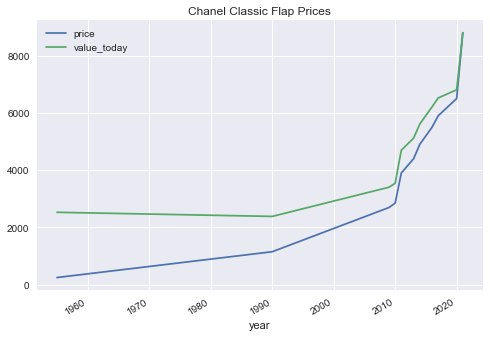

In [98]:
med_classic[['price', 'value_today']].plot(title='Chanel Classic Flap Prices');

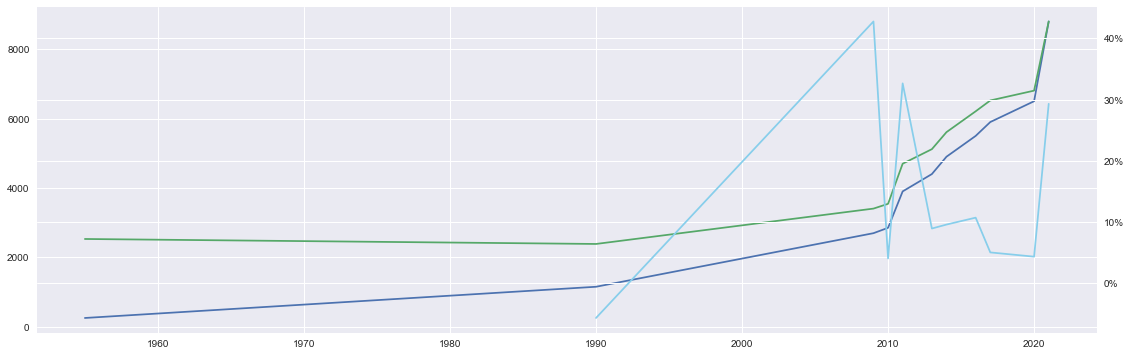

In [31]:
fig, ax = plt.subplots(figsize=(19,6))

ax.plot(med_classic['price'], label='Selling Price')
ax.plot(med_classic['value_today'], label="Today's Price")

ax2 = ax.twinx()
ax2.plot(med_classic['change_today'], label="% Change", color='skyblue')
ax2.yaxis.set_major_formatter(PercentFormatter(1))